<a href="https://colab.research.google.com/github/venkateswara489/Machine-learning/blob/main/LAB4_AP23110011489.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2 align="center"> Logistic Regression </h2>

### Task 2: Load the Data and Libraries
---

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
plt.style.use("ggplot")
%matplotlib inline

In [61]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8

In [62]:
df=pd.read_csv("DMV_Written_Tests.csv")
df.head()

,DMV_Test_1,DMV_Test_2,Results
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


### Task 3: Visualize the Data
---

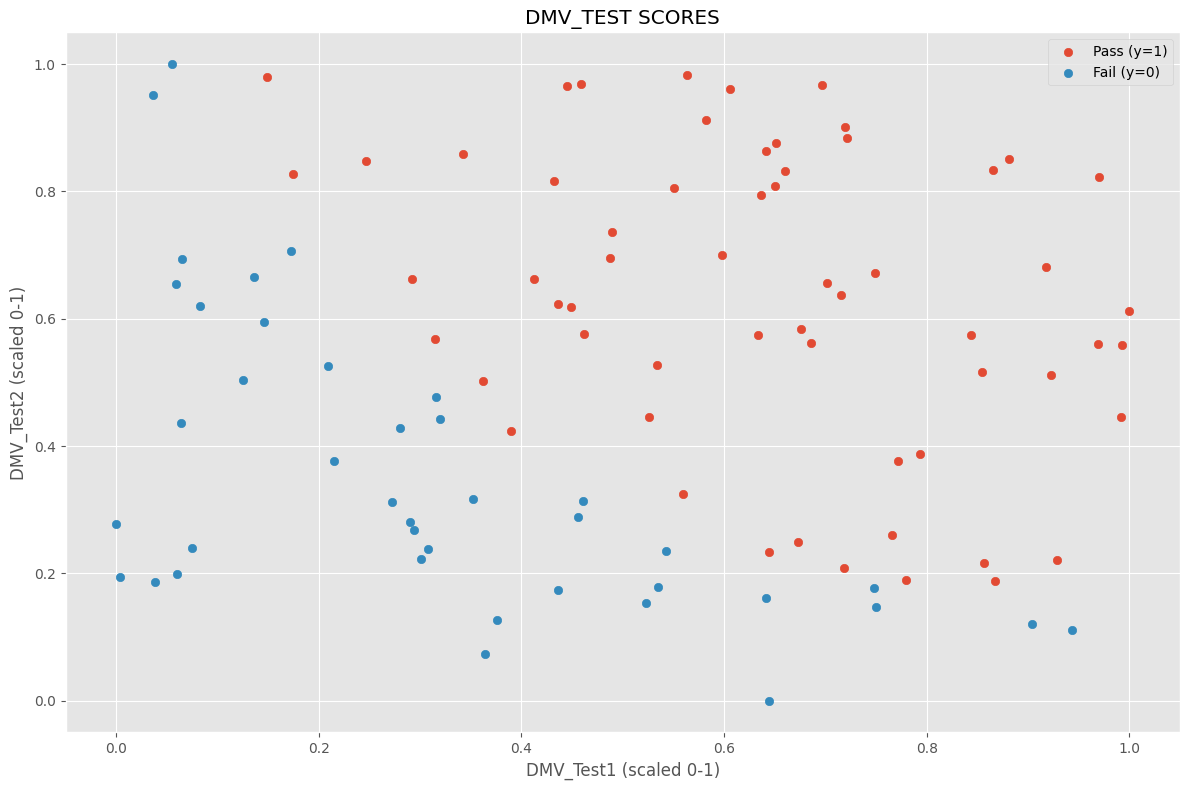

In [63]:
def minmax(a:np.ndarray):
    return (a-a.min())/(a.max()-a.min())
DMV_Test1=minmax(df["DMV_Test_1"].values)
DMV_Test2=minmax(df["DMV_Test_2"].values)
y=df['Results'].values.astype(float)

X=np.column_stack([DMV_Test1,DMV_Test2])

plt.figure()
plt.scatter(X[y==1,0], X[y==1,1], label='Pass (y=1)')
plt.scatter(X[y==0,0], X[y==0,1], label='Fail (y=0)')
plt.xlabel('DMV_Test1 (scaled 0-1)')
plt.ylabel('DMV_Test2 (scaled 0-1)')
plt.legend()
plt.title('DMV_TEST SCORES')
plt.tight_layout()
plt.show()


### Task 4: Define the Logistic Sigmoid Function $\sigma(z)$
---

$$ \sigma(z) = \frac{1}{1+e^{-z}}$$

In [64]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

### Task 5: Compute the Cost Function $J(\theta)$ and Gradient
---

The objective of logistic regression is to minimize the cost function

$$J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} [ y^{(i)}log(h_{\theta}(x^{(i)})) + (1 - y^{(i)})log(1 - (h_{\theta}(x^{(i)}))]$$

where the gradient of the cost function is given by

$$ \frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\theta}(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [65]:
def compute_cost(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    cost = (-1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

def compute_gradient(theta, X, y):
    m = len(y)
    h = sigmoid(X.dot(theta))
    gradient = (1/m) * X.T.dot(h - y)
    return gradient
m = len(y)
X_with_intercept = np.hstack((np.ones((m, 1)), X))

initial_theta = np.zeros(X_with_intercept.shape[1])

### Task 6: Cost and Gradient at Initialization
---

In [66]:
cost_at_init = compute_cost(initial_theta, X_with_intercept, y)
grad_at_init = compute_gradient(initial_theta, X_with_intercept, y)
print('Cost at initial theta (zeros):', cost_at_init)
print('Gradient at initial theta (zeros):', grad_at_init)

Cost at initial theta (zeros): 0.6931471805599453
Gradient at initial theta (zeros): [-0.1        -0.12904484 -0.12015491]


### Task 7: Gradient Descent
---

Minimize the cost function $J(\theta)$ by updating the below equation and repeat until convergence
$\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}$ (simultaneously update $\theta_j$ for all $j$)

Optimized theta: [-2.58657994  3.32986531  2.91193734]


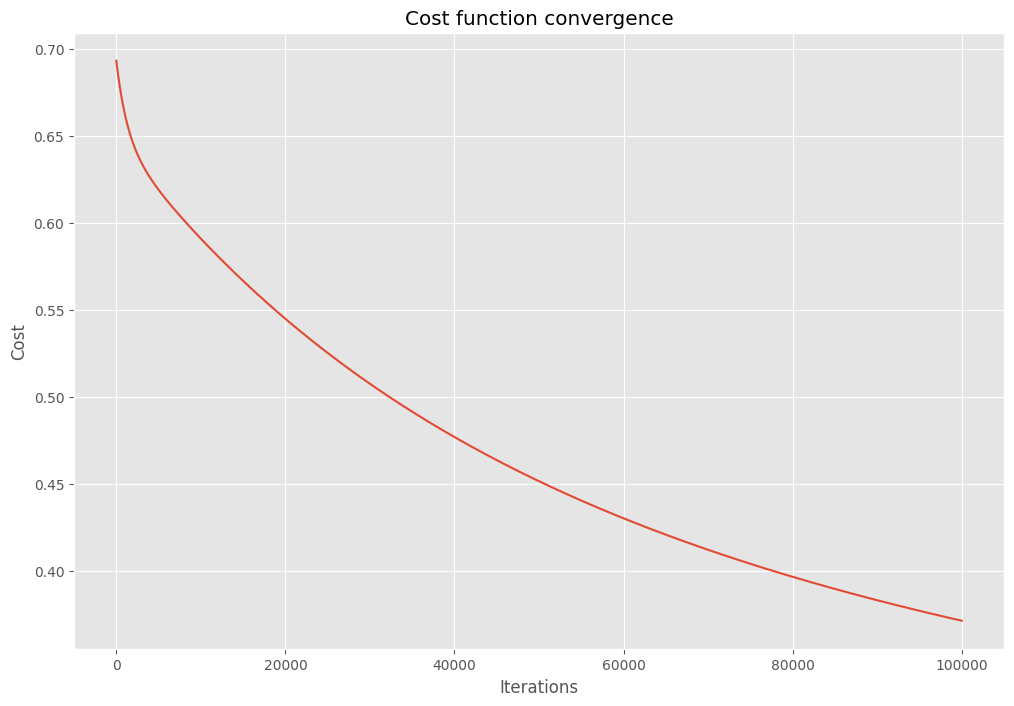

In [67]:
def gradient_descent(X, y, theta, alpha, num_iters):
    J_history = []

    for i in range(num_iters):
        gradient = compute_gradient(theta, X, y)
        theta -= alpha * gradient
        cost = compute_cost(theta, X, y)
        J_history.append(cost)

    return theta, J_history

alpha = 0.001
num_iters = 100000
theta_optimized, J_history = gradient_descent(X_with_intercept, y, initial_theta, alpha, num_iters)

print('Optimized theta:', theta_optimized)


plt.plot(J_history)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost function convergence')
plt.show()

### Task 8: Plotting the Convergence of $J(\theta)$
---

Plot $J(\theta)$ against the number of iterations of gradient descent:

In [68]:
def predict(theta, X):
    prob = sigmoid(X.dot(theta))
    return [1 if p >= 0.5 else 0 for p in prob]

predictions = predict(theta_optimized, X_with_intercept)
accuracy = np.mean(predictions == y) * 100
print('Training Accuracy: {:.2f}%'.format(accuracy))

Training Accuracy: 91.00%


### Task 9: Plotting the decision boundary
---

$h_\theta(x) = \sigma(z)$, where $\sigma$ is the logistic sigmoid function and $z = \theta^Tx$

When $h_\theta(x) \geq 0.5$ the model predicts class "1":

$\implies \sigma(\theta^Tx) \geq 0.5$

$\implies \theta^Tx \geq 0$ predict class "1"

Hence, $\theta_1 + \theta_2x_2 + \theta_3x_3 = 0$ is the equation for the decision boundary, giving us

$ x_3 = \frac{-(\theta_1+\theta_2x_2)}{\theta_3}$

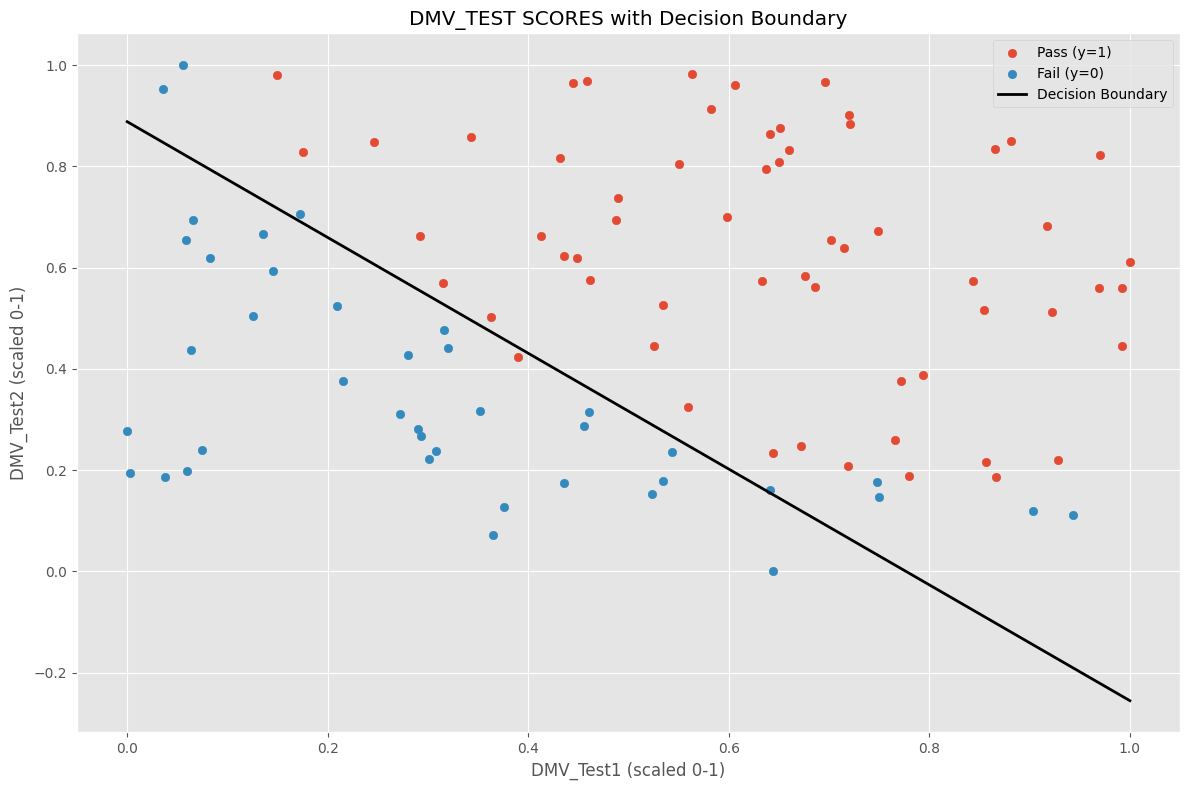

In [69]:
# Plotting the decision boundary
x_values = np.array([np.min(X_with_intercept[:, 1]), np.max(X_with_intercept[:, 1])])
y_values = -(theta_optimized[0] + theta_optimized[1] * x_values) / theta_optimized[2]

plt.figure()
plt.scatter(X[y==1,0], X[y==1,1], label='Pass (y=1)')
plt.scatter(X[y==0,0], X[y==0,1], label='Fail (y=0)')
plt.plot(x_values, y_values, c='k', lw=2, label='Decision Boundary')
plt.xlabel('DMV_Test1 (scaled 0-1)')
plt.ylabel('DMV_Test2 (scaled 0-1)')
plt.legend()
plt.title('DMV_TEST SCORES with Decision Boundary')
plt.tight_layout()
plt.show()

### Task 10: Predictions using the optimized $\theta$ values
---

$h_\theta(x) = x\theta$

In [70]:
predictions = predict(theta_optimized, X_with_intercept)
accuracy = np.mean(predictions == y) * 100
print(f"Training Accuracy: {accuracy:.2f}%")

Training Accuracy: 91.00%
